In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix ,classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Importing Dataset
train = pd.read_csv('Titanic_train.csv')
test = pd.read_csv('Titanic_test.csv')
train_pass=train.shape[0]

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Dataset Info

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data=train.copy()

In [7]:
# Create an empty dataframe
Pclass = pd.DataFrame()

# Calculate the total number of passengers in each class
Pclass['Total Passinger'] = train_data.groupby('Pclass')['Survived'].size()

# Calculate the number of solo passengers in each class
solo_passengers = train_data.loc[(train_data.SibSp == 0) & (train_data.Parch == 0)]
Pclass['Solo Passinger'] = solo_passengers.groupby('Pclass').size()

# Calculate the number of family members in each class
Pclass['Family_Size'] = Pclass['Total Passinger'] - Pclass['Solo Passinger']

# Calculate the median age of passengers in each class
Pclass['median Age'] = train_data.groupby('Pclass')['Age'].median().astype(int)

# Calculate the median age of female passengers in each class
Pclass['(Sex)female'] = train_data.loc[train_data['Sex'] == 'female'].groupby('Pclass')['Age'].median().astype(int)

# Calculate the median age of male passengers in each class
Pclass['(Sex)male'] = train_data.loc[train_data['Sex'] == 'male'].groupby('Pclass')['Age'].median().astype(int)

# Calculate the mean fare for each class
Pclass['Mean Fare'] = train_data.groupby('Pclass')['Fare'].mean().astype(int)

# Calculate the number of passengers who survived in each class
Pclass['Survived'] = train_data.groupby('Pclass')['Survived'].sum().astype(int)

# Calculate the number of passengers who did not survive in each class
Pclass['Not Survived'] = Pclass['Total Passinger'] - Pclass['Survived']

# Calculate the percentage of passengers who survived in each class
Pclass['Survived percent'] = Pclass['Survived'] / Pclass['Total Passinger'] * 100

# Display the dataframe with a color gradient
display(Pclass.style.background_gradient(cmap='YlGnBu'))

,Total Passinger,Solo Passinger,Family_Size,median Age,(Sex)female,(Sex)male,Mean Fare,Survived,Not Survived,Survived percent
Pclass,,,,,,,,,,
1,216,109,107,37,35,40,84,136,80,62.962963
2,184,104,80,29,28,30,20,87,97,47.282609
3,491,324,167,24,21,25,13,119,372,24.236253


In [8]:
train_data.loc[(train_data.Age >=0)  & (train_data.Age <=9),'age_group'] = '0-9'
train_data.loc[(train_data.Age >=10) &(train_data.Age <=19),'age_group'] = '10-19'
train_data.loc[(train_data.Age >=20) & (train_data.Age <=29),'age_group'] = '20-29'
train_data.loc[(train_data.Age >=30) & (train_data.Age <=39),'age_group'] = '30-39'
train_data.loc[(train_data.Age >=40) & (train_data.Age <=49),'age_group'] = '40-49'
train_data.loc[(train_data.Age >=50) & (train_data.Age <=59),'age_group'] = '50-59'
train_data.loc[(train_data.Age >=60) & (train_data.Age <=69),'age_group'] = '60-69'
train_data.loc[(train_data.Age >=70) & (train_data.Age <=80),'age_group'] = '70-80'

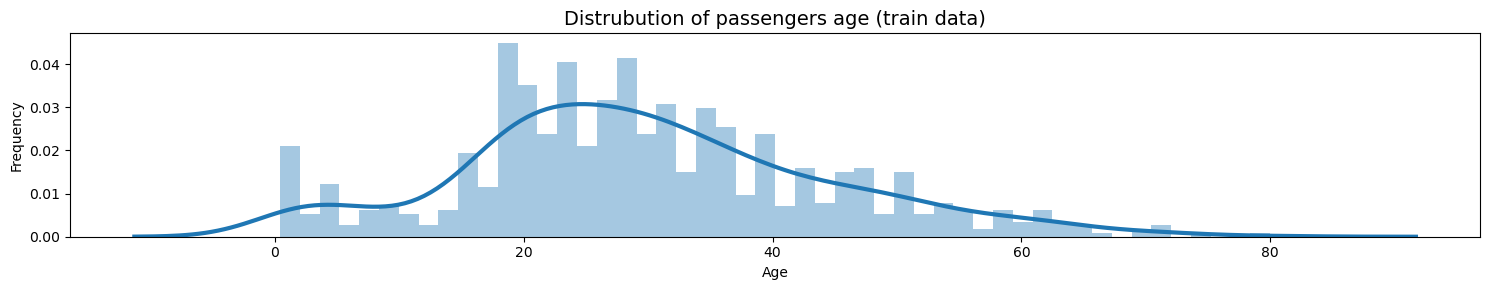

In [9]:
plt.figure(figsize=(15, 3))

# plot a univariate distribution of Age observations 
sns.distplot(train_data[(train_data["Age"] > 0)].Age, kde_kws={"lw": 3}, bins = 50)

# set titles and labels
plt.title('Distrubution of passengers age (train data)',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')
# clean layout
plt.tight_layout()

In [10]:
age_distr = pd.DataFrame(train_data['Age'].describe())
# Transpose index and columns.
age_distr.transpose()

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0


In [11]:
age_group=train_data.groupby(['age_group'])['Survived'].value_counts().unstack(-2)

age_group.rename(index={1: 'Survived',0:'Not-survived'}, inplace=True)
age_group.index.name = 'Survived ?'
age_group.columns.name = 'Age_Group'
display(age_group.style.background_gradient(cmap='YlGnBu'))

Age_Group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-80,nan
Survived ?,,,,,,,,,
Not-survived,24,61,143,94,55,28,13,6,125
Survived,38,41,77,73,34,20,6,1,52


In [12]:
age_group=train_data.groupby(['age_group','Survived'])['Pclass'].value_counts().unstack(0)
age_group=age_group.fillna(0)
age_group=age_group.astype(int)
display(age_group.style.background_gradient(cmap='YlGnBu'))

In [13]:
age_group=train_data.groupby(['age_group','Survived'])['Sex'].value_counts().unstack(0)
age_group=age_group.fillna(0)
age_group=age_group.astype(int)
display(age_group.style.background_gradient(cmap='YlGnBu'))

In [14]:
age_group=train_data.groupby(['Survived','Pclass'])['Sex'].value_counts().unstack(-1)
age_group=age_group.fillna(0)
age_group=age_group.astype(int)
display(age_group.style.background_gradient(cmap='YlGnBu'))

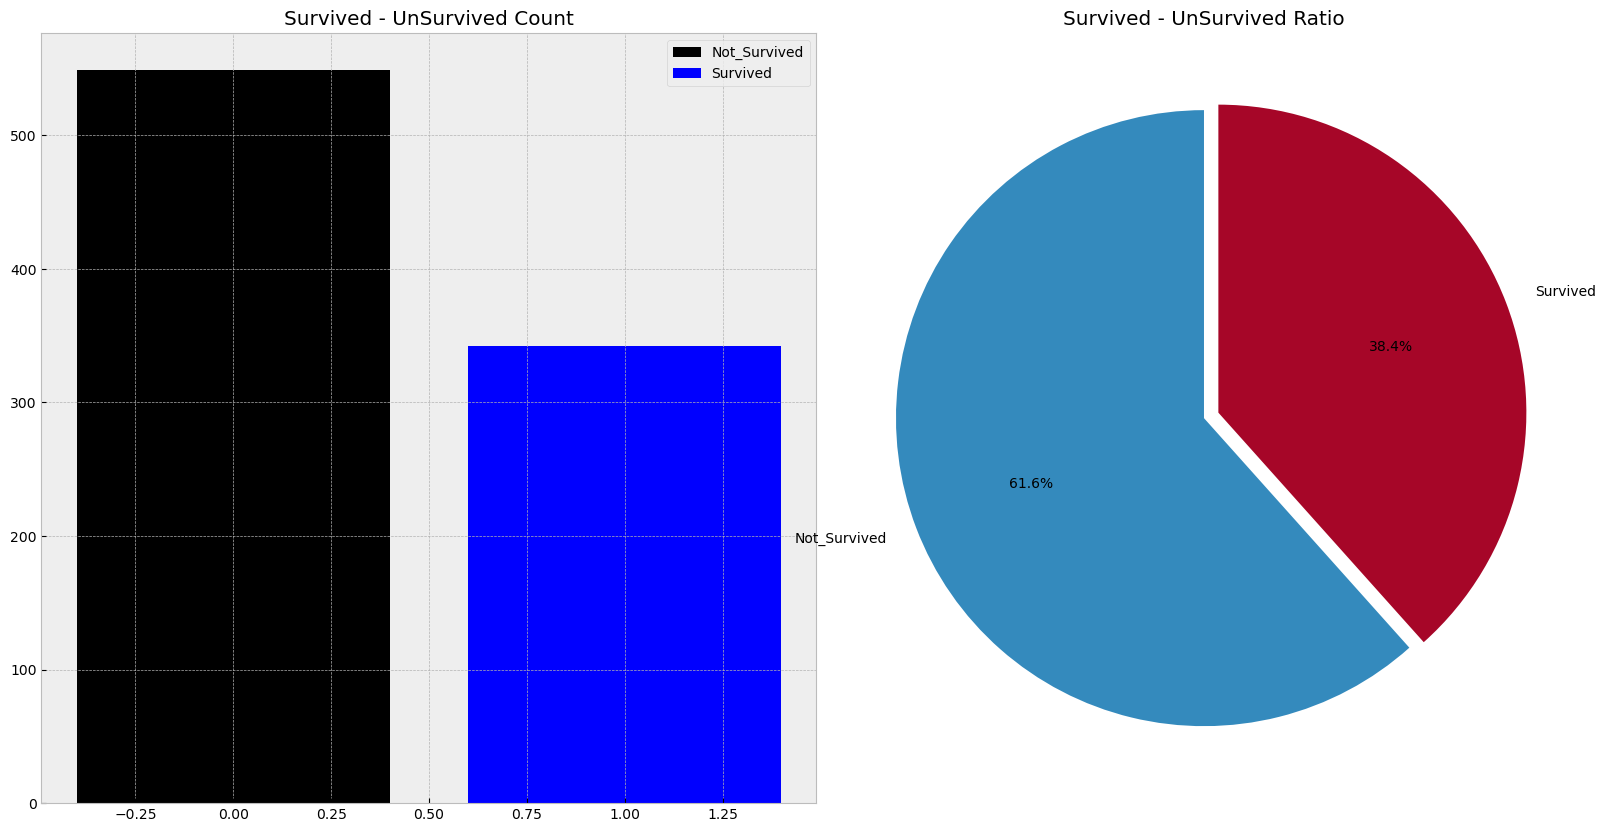

In [15]:
plt.style.use('bmh')
data=train_data['Survived'].value_counts()
labels=data.index
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.subplots_adjust(wspace=0)
ax2.set_title('Survived - UnSurvived Ratio')
ax2.pie(data,startangle=90,explode=[0,0.05],autopct='%1.1f%%',labels=['Not_Survived', 'Survived'])
ax1.bar(labels[0],data[0],color='black')
ax1.bar(labels[1],data[1],color='blue')
ax1.legend(labels=['Not_Survived', 'Survived'])
ax1.set_title('Survived - UnSurvived Count')

plt.show()

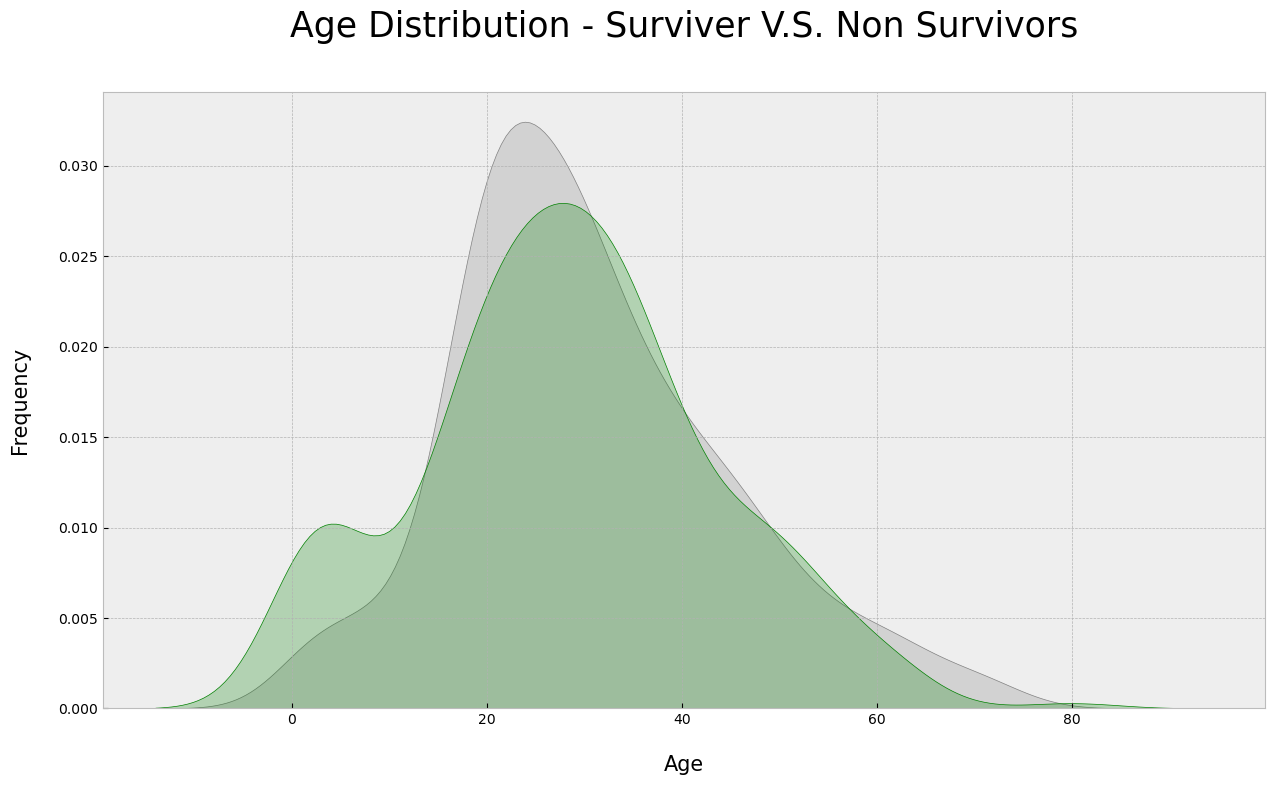

In [16]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25, pad = 40)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

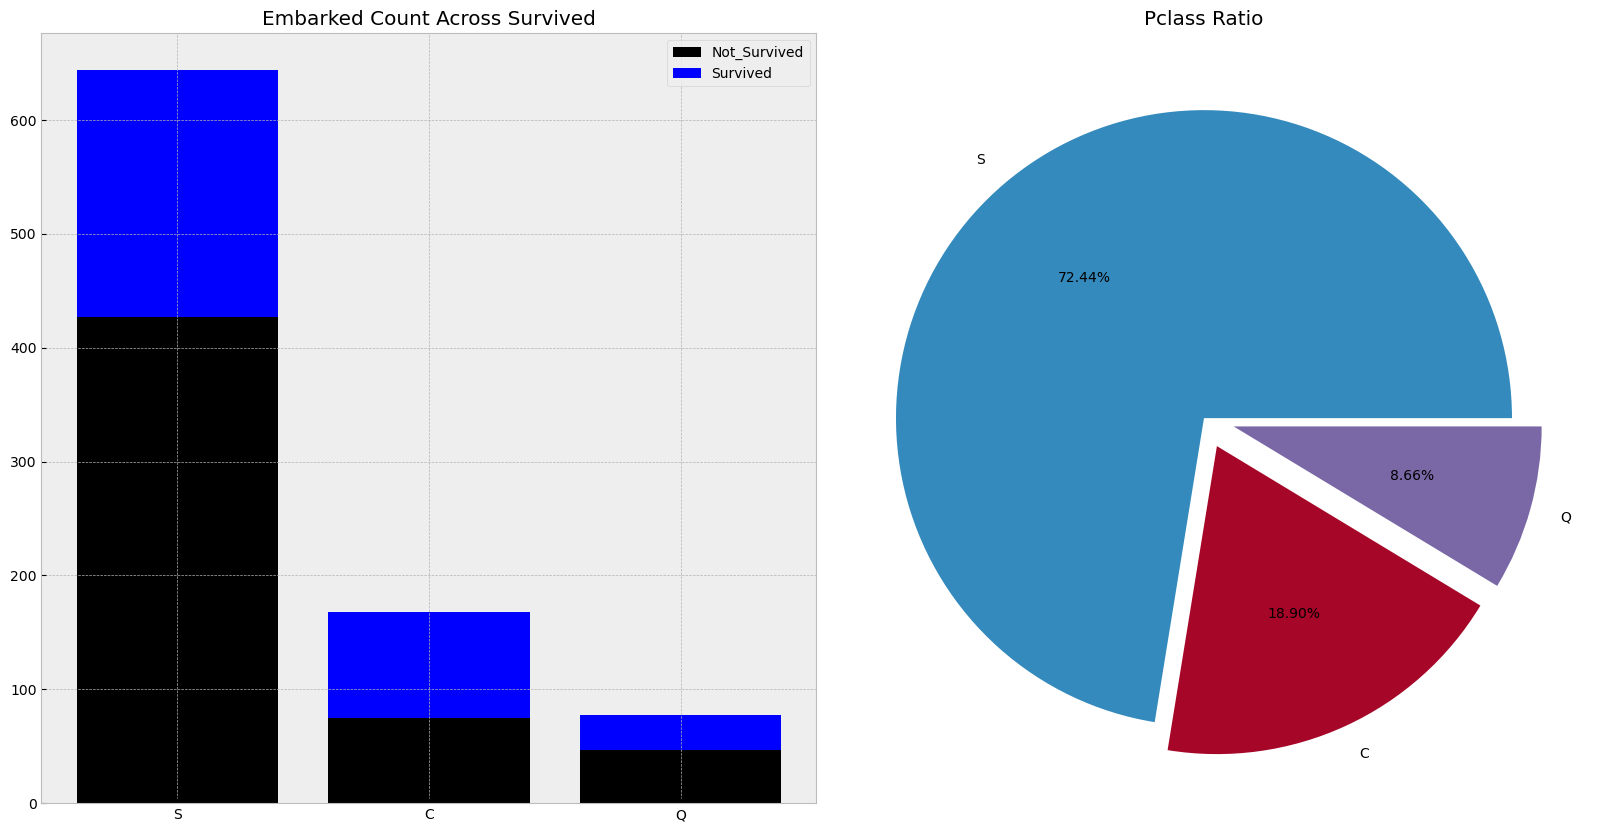

In [17]:
data=train_data['Embarked'].value_counts()
labels=data.index
data1=pd.DataFrame()
for i in range(labels.size):
    data1[labels[i]]=train_data.loc[(train_data.Embarked ==labels[i])]['Survived'].value_counts()

X0=data1.loc[0]
X1=data1.loc[1]
plt.style.use('bmh')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.subplots_adjust(wspace=0)
ax2.set_title('Pclass Ratio')
ax2.pie(data, explode=[0,0.1,0.1],autopct='%2.2f%%',labels=data.index)
ax1.bar(labels, X0,color='black')
ax1.bar(labels, X1,bottom=X0,color='blue')
ax1.legend(labels=['Not_Survived', 'Survived'])
ax1.set_title('Embarked Count Across Survived')

plt.show()

In [18]:
target=train['Survived']
All_Features=pd.concat([train,test]).reset_index(drop=True)

In [19]:
All_Features['Age']=All_Features.groupby(['Sex','Pclass'])['Age'].apply(lambda x:x.fillna(x.median())).reset_index(drop=True)

In [20]:
All_Features['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [21]:
All_Features['Embarked']=All_Features['Embarked'].fillna('S')
All_Features['Fare']=All_Features.groupby(['Sex','Pclass'])['Fare'].apply(lambda x:x.fillna(x.median())).reset_index(drop=True)

In [22]:
All_Features=All_Features.drop(['Cabin','Ticket','Name','PassengerId'],axis=1)

In [23]:
All_Features.loc[(All_Features.Age >=0)  & (All_Features.Age <=9),'age_group'] = 0
All_Features.loc[(All_Features.Age >=10) &(All_Features.Age <=19),'age_group'] = 1
All_Features.loc[(All_Features.Age >=20) & (All_Features.Age <=29.9),'age_group'] = 2
All_Features.loc[(All_Features.Age >=30) & (All_Features.Age <=39),'age_group'] = 3
All_Features.loc[(All_Features.Age >=40) & (All_Features.Age <=49),'age_group'] = 4
All_Features.loc[(All_Features.Age >=50) & (All_Features.Age <=59),'age_group'] = 5
All_Features.loc[(All_Features.Age >=60) & (All_Features.Age <=69),'age_group'] = 6
All_Features.loc[(All_Features.Age >=70) & (All_Features.Age <=80),'age_group'] = 7

In [24]:
All_Features['Family_Size']=All_Features['SibSp']+All_Features['Parch']
All_Features.loc[(All_Features.Family_Size == 0),'Solo_Passanger'] = 1
All_Features.loc[(All_Features.Family_Size > 0),'Solo_Passanger'] = 0
All_Features['Solo_Passanger'].value_counts()

Solo_Passanger
1.0    790
0.0    519
Name: count, dtype: int64

In [25]:
All_Features=pd.get_dummies(All_Features,dtype=int)
All_Features.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,age_group,Family_Size,Solo_Passanger,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,38.0,1,0,71.2833,3.0,1,0.0,0,1,0,0,1
1,1.0,1,35.0,1,0,53.1000,3.0,1,0.0,1,0,1,0,0
2,1.0,3,58.0,0,0,26.5500,5.0,0,1.0,1,0,0,0,1
3,1.0,1,36.0,1,0,146.5208,3.0,1,0.0,1,0,0,0,1
4,0.0,3,49.0,0,0,76.7292,4.0,0,1.0,0,1,0,0,1


In [26]:
All_Features=All_Features.drop(['Survived','Age'],axis=1)
All_Features_SL = StandardScaler().fit_transform(All_Features)
print('All_Features shape: {}'.format(All_Features.shape))

All_Features shape: (1309, 12)


In [27]:
train=All_Features_SL[:train_pass]
test=All_Features_SL[train_pass:]
print('train shape: {}'.format(train.shape))
print('test shape: {}'.format(test.shape))
print('target shape: {}'.format(target.shape))

train shape: (891, 12)
test shape: (418, 12)
target shape: (891,)


## Machine Learning
##### Split Data
# Logistic Regression

In [28]:
x_train,x_test,y_train,y_test=train_test_split(train,target,test_size=.33,random_state=42,shuffle=True)

Accuracy for  LogisticRegression is  0.7932203389830509


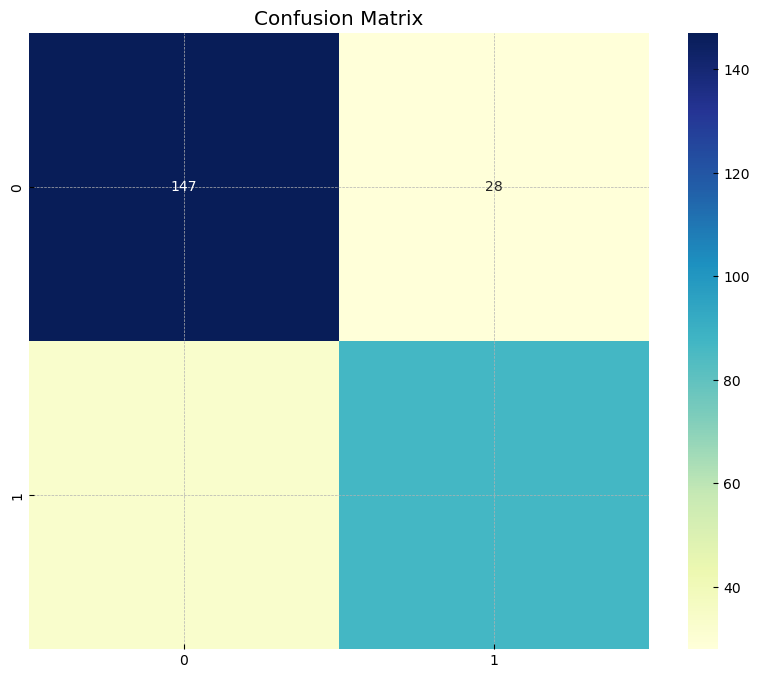

In [29]:
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('Accuracy for  LogisticRegression is ',metrics.accuracy_score(pred,y_test))
plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred), annot=True, ax = ax, fmt='g',cmap='YlGnBu') 
ax.set_title('Confusion Matrix')
plt.show()

In [30]:
from sklearn.metrics import  accuracy_score as ac, roc_curve, roc_auc_score , recall_score , precision_score, f1_score
confusion_matrix = confusion_matrix(y_test,pred)
print (confusion_matrix)
#[row, column]
TP = confusion_matrix[1, 1]
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]

[[147  28]
 [ 33  87]]


In [31]:
((147+87)/(147+28+33+87))*100 #Accuracy

79.3220338983051

### Recall

In [32]:
recall = TP / float(FN + TP)

print(recall)
print(recall_score(y_test, pred))

0.725
0.725


### Precision

In [33]:
precision = TP / float(TP + FP)

print(precision)
print(precision_score(y_test, pred))

0.7565217391304347
0.7565217391304347


### f1-score

In [34]:
f1_score = 2*((precision_score(y_test, pred) * recall_score(y_test, pred))/(precision_score(y_test, pred) + recall_score(y_test, pred)))
f1_score

0.7404255319148936

In [35]:
# print the classification report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       175
           1       0.76      0.72      0.74       120

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



### ROC-AUC 

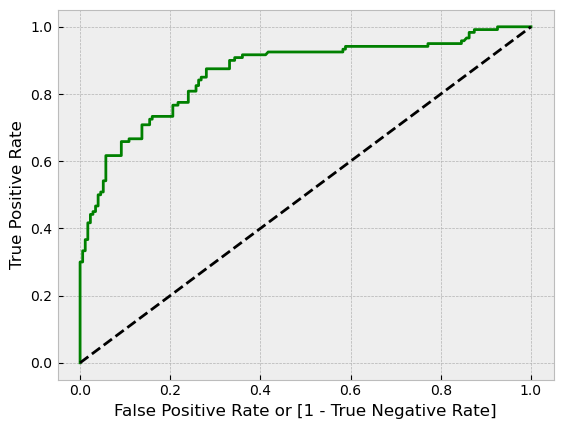

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

auc = roc_auc_score(y_test, pred)
plt.plot(fpr, tpr, color='Green')
plt.plot([0, 1], [0, 1], 'k--')# x axis range is 0 to 1, y axis range is 0 to 1, k-- is a line type - dotted
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show() # green one is roc curve

In [37]:
auc

0.7825